## Citi Bike Mini Project Notebook

In [2]:
from __future__ import print_function

import os
import sys

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from scipy.stats import median_test
from scipy.stats import mannwhitneyu

In [4]:
!ls /gws/open/Student/citibike

201307-citibike-tripdata.zip  201508-citibike-tripdata.zip
201308-citibike-tripdata.zip  201509-citibike-tripdata.zip
201309-citibike-tripdata.zip  201510-citibike-tripdata.zip
201310-citibike-tripdata.zip  201511-citibike-tripdata.zip
201311-citibike-tripdata.zip  201512-citibike-tripdata.zip
201312-citibike-tripdata.zip  201601-citibike-tripdata.zip
201401-citibike-tripdata.zip  201602-citibike-tripdata.zip
201402-citibike-tripdata.zip  201603-citibike-tripdata.zip
201403-citibike-tripdata.zip  201604-citibike-tripdata.zip
201404-citibike-tripdata.zip  201605-citibike-tripdata.zip
201405-citibike-tripdata.zip  201606-citibike-tripdata.zip
201406-citibike-tripdata.zip  201607-citibike-tripdata.zip
201407-citibike-tripdata.zip  201608-citibike-tripdata.zip
201408-citibike-tripdata.zip  201609-citibike-tripdata.zip
201409-citibike-tripdata.zip  201610-citibike-tripdata.zip
201410-citibike-tripdata.zip  201611-citibike-tripdata.zip
201411-citibike-tripdata.zip  201612-citibike-tripdata.z

In [5]:
citi_bike_df =pd.read_csv('/gws/open/Student/citibike/201707-citibike-tripdata.csv.zip', compression='zip')

In [6]:
citi_bike_df.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986.0,1
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789210,-73.943708,19587,Subscriber,1981.0,1
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984.0,2


## Null hypothesis 
## $H_0$ : Average Trip duration during weekends is same or less than weekdays
## $H_0$: (Avg. Trip Duration)$_{weekends}$ <= (Avg. Trip Duration)$_{weekdays}$

## Alternate hypothesis 
## $H_1$ : Average Trip duration during weekends more than weekdays
## $H_1$: (Avg. Trip Duration)$_{weekends}$ > (Avg. Trip Duration)$_{weekdays}$

In [7]:
citi_bike_df['dayofweek']=pd.to_datetime(citi_bike_df['starttime']).dt.dayofweek

In [8]:
citi_bike_df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'dayofweek'],
      dtype='object')

In [9]:
citi_bike_df.drop(['starttime','stoptime','start station id','start station name',
                   'start station latitude','start station longitude','end station id',
                   'end station name','end station latitude','end station longitude',
                  'bikeid','birth year','gender','usertype'],axis=1,inplace=True)

In [10]:
citi_bike_df.head(3)

,tripduration,dayofweek
0,364,5
1,2142,5
2,328,5


In [11]:
days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
citi_bike_df['day'] = citi_bike_df['dayofweek'].map(days)

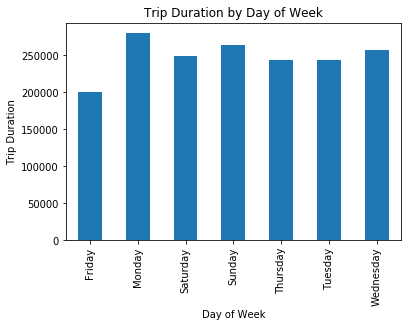

In [12]:
## Plot of number of trips by day of week
axtrips = citi_bike_df['tripduration'].groupby(citi_bike_df['day']).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False, title="Trip Duration by Day of Week")
pl.xlabel('Day of Week')
pl.ylabel('Trip Duration')

#### [Figure 1: Trip Duration by weekdays for the month of july]

In [13]:
## Get Average Trip Duration for weekdays and Weekends
weekday_trips = citi_bike_df[citi_bike_df['dayofweek'] <= 4]['tripduration']
weekend_trips = citi_bike_df[citi_bike_df['dayofweek']> 4]['tripduration']

In [14]:
weekend_trip_avg = weekend_trips.mean()
weekday_trip_avg = weekday_trips.mean()

## Check if Avg_trip_duration(weekend) - Avg_trip_duration(weekday) > 0
if(weekend_trip_avg - weekday_trip_avg) < 0:
    ##Null cannot be rejected
    print("Null hypothesis cannot be rejected")
else:
    print("Further test need to be performed to test the hypothesis")

Further test need to be performed to test the hypothesis


## The Tests
## $\alpha$ = 0.05

### 1. Mann Whitney U test

In [15]:
result_mann_whitney = mannwhitneyu(weekday_trips,weekend_trips)

In [16]:
result_mann_whitney

MannwhitneyuResult(statistic=276047462645.5, pvalue=0.0)

### 2.Moods median test

In [19]:
result_moods_median = median_test(weekday_trips,weekend_trips)

In [20]:
result_moods_median

(11279.407917891802, 0.0, 676.0, array([[579360, 288033],
        [643759, 224447]]))

## Test Results

### The p-value for both tests is less than 0.05, therefore the null nypothesis can be rejected.